### Pytorch Foundamentals

In [19]:
# Question 1. Loading Data : Load the Synchronous Machine Learning Dataset as Numpy array
import zipfile
import pandas as pd
import requests
import numpy as np

url = "https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip"
file_path = "data.zip"

response = requests.get(url)
response.raise_for_status()

with open(file_path, "wb") as file:
    file.write(response.content)

with zipfile.ZipFile("data.zip", 'r') as my_zip:
    my_zip.extractall()
    
dataset_name = "synchronous machine.csv"
data = pd.read_csv(dataset_name, delimiter=";", thousands=",")

#a. Load the Synchronous Machine Learning Dataset as Numpy array
numpy_data = data.values

In [20]:
print(data.head())
print(numpy_data)

   Iy  PF   e  dIf    If
0   3  66  34  383  1563
1   3  68  32  372  1552
2   3   7   3   36   154
3   3  72  28  338  1518
4   3  74  26  317  1497
[[   3   66   34  383 1563]
 [   3   68   32  372 1552]
 [   3    7    3   36  154]
 ...
 [   6   95    5   16  134]
 [   6   97    3   16  134]
 [   6   99    1   16  134]]


In [21]:
# b. Convert the Numpy array to PyTorch tensor, original_data_tensor
import torch
original_data_tensor = torch.tensor(numpy_data)

In [22]:
print(original_data_tensor)

tensor([[   3,   66,   34,  383, 1563],
        [   3,   68,   32,  372, 1552],
        [   3,    7,    3,   36,  154],
        ...,
        [   6,   95,    5,   16,  134],
        [   6,   97,    3,   16,  134],
        [   6,   99,    1,   16,  134]])


In [23]:
# Question 2. Art of “Tensor Manipulation”
# a. print the size of the dataset
print(original_data_tensor.size())
print(original_data_tensor.shape)

torch.Size([557, 5])
torch.Size([557, 5])


In [24]:
""" b. Create a tensor, my_pi_tensor of same size as original original_data_tensor containing values of 3.142 at every point
and placed on your GPU device. Print the first 13 rows. Print tensor device location. Print tensor datatype."""
# Create my_pi_tensor with the same size as original_data_tensor
my_pi_tensor = torch.full_like(original_data_tensor, 3.142)

# Move my_pi_tensor to the GPU device if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
my_pi_tensor = my_pi_tensor.to(device)

# Print the first 13 rows of my_pi_tensor
print(my_pi_tensor[:13])

# Print tensor device location
print("Tensor Device:", my_pi_tensor.device)

# Print tensor datatype
print("Tensor Data Type:", my_pi_tensor.dtype)

tensor([[3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3]])
Tensor Device: cpu
Tensor Data Type: torch.int64


In [25]:
# c. Print the fifth-root of sum of all values in my_pi_tensor
# Calculate the fifth root of the sum of all values in my_pi_tensor
result = torch.pow(my_pi_tensor.sum(), 1/5)

# Print the result
print("Fifth root of the sum:", result)

Fifth root of the sum: tensor(6.0868)


In [26]:
"""
d. Create a new tensor, my_data_tensor using the first and last 100 rows from the original_data_tensor. Print size of 
my_data_tensor
"""
# Select the first and last 100 rows from original_data_tensor
selected_rows = torch.cat((original_data_tensor[:100], original_data_tensor[-100:]))

# Create the new tensor my_data_tensor
my_data_tensor = selected_rows.clone()

# Print the size of my_data_tensor
print("Size of my_data_tensor:", my_data_tensor.size())

Size of my_data_tensor: torch.Size([200, 5])


In [27]:
"""
e. Create two 1-D tensors, features and target from my_data_tensor. The feature is dIf (Changing of excitation current 
of synchronous machine) I) column and target is If (Excitation current of synchronous machine)
"""
# Create *known* parameters
weight = 0.7
bias = 0.3

# Extract the "dIf" column as features tensor
features = my_data_tensor[:, 0]

# Extract the "If" column as target tensor
target = weight * my_data_tensor[:, 1] + bias


# Print the size of the tensors
print("Size of features tensor:", features.size())
print("Size of target tensor:", target.size())

Size of features tensor: torch.Size([200])
Size of target tensor: torch.Size([200])


In [28]:
# Create train/test split
train_split = int(0.75 * len(features)) # 75% of data used for training set, 25% for testing 
features_train, target_train = features[:train_split], target[:train_split]
features_test, target_test = features[train_split:], target[train_split:]

len(features_train), len(target_train), len(features_test), len(target_test)

(150, 150, 50, 50)

### Pytorch Workflow Foundamentals

In [29]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=features_train, 
                     train_labels=target_train, 
                     test_data=features_test, 
                     test_labels=target_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

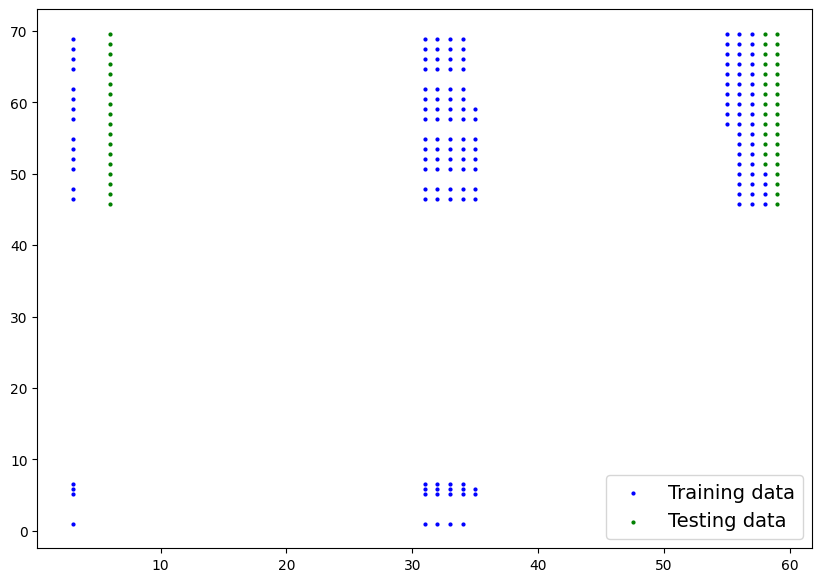

In [30]:
plot_predictions()

In [31]:
import torch.nn as nn
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [32]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [33]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [34]:
# Make predictions with model
with torch.inference_mode(): 
    target_preds = model_0(features_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [35]:
# Check the predictions
print(f"Number of testing samples: {len(features_test)}") 
print(f"Number of predictions made: {len(target_preds)}")
print(f"Predicted values:\n{target_preds}")

Number of testing samples: 50
Number of predictions made: 50
Predicted values:
tensor([19.6569, 19.6569, 19.6569, 19.6569, 19.6569, 19.6569, 19.6569, 19.6569,
        19.6569, 19.6569, 19.6569, 19.6569, 19.6569, 19.6569, 19.9935, 19.9935,
        19.9935, 19.9935, 19.9935, 19.9935, 19.9935, 19.9935, 19.9935, 19.9935,
        19.9935, 19.9935, 19.9935, 19.9935, 19.9935, 19.9935, 19.9935, 19.9935,
         2.1490,  2.1490,  2.1490,  2.1490,  2.1490,  2.1490,  2.1490,  2.1490,
         2.1490,  2.1490,  2.1490,  2.1490,  2.1490,  2.1490,  2.1490,  2.1490,
         2.1490,  2.1490])


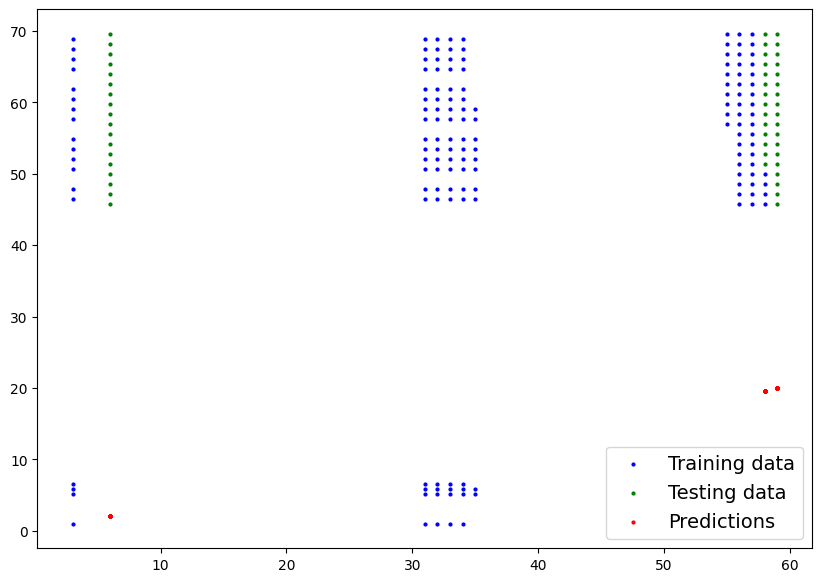

In [36]:
plot_predictions(predictions=target_preds)

In [37]:
target_test - target_preds

tensor([31.7431, 33.1432, 34.5431, 35.9431, 37.3431, 38.7431, 40.1432, 41.5431,
        42.9431, 44.3431, 45.7431, 47.1432, 48.5432, 49.9431, 25.8065, 27.2065,
        28.6065, 30.0065, 31.4065, 32.8065, 34.2065, 35.6065, 37.0065, 38.4065,
        39.8065, 41.2065, 42.6065, 44.0065, 45.4065, 46.8065, 48.2065, 49.6065,
        43.6510, 45.0510, 46.4510, 47.8510, 49.2510, 50.6510, 52.0510, 53.4510,
        54.8510, 56.2510, 57.6510, 59.0510, 60.4510, 61.8510, 63.2510, 64.6511,
        66.0511, 67.4510])

In [38]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [39]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    target_pred = model_0(features_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(target_pred, target_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(features_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, target_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 38.85260009765625 | MAE Test Loss: 33.44229507446289 
Epoch: 10 | MAE Train Loss: 20.1838321685791 | MAE Test Loss: 24.359485626220703 
Epoch: 20 | MAE Train Loss: 20.178014755249023 | MAE Test Loss: 24.249868392944336 
Epoch: 30 | MAE Train Loss: 20.17315673828125 | MAE Test Loss: 24.34795379638672 
Epoch: 40 | MAE Train Loss: 20.167461395263672 | MAE Test Loss: 24.23833656311035 
Epoch: 50 | MAE Train Loss: 20.1624813079834 | MAE Test Loss: 24.3364315032959 
Epoch: 60 | MAE Train Loss: 20.156909942626953 | MAE Test Loss: 24.226816177368164 
Epoch: 70 | MAE Train Loss: 20.151880264282227 | MAE Test Loss: 24.321123123168945 
Epoch: 80 | MAE Train Loss: 20.146333694458008 | MAE Test Loss: 24.211509704589844 
Epoch: 90 | MAE Train Loss: 20.14127540588379 | MAE Test Loss: 24.30582046508789 


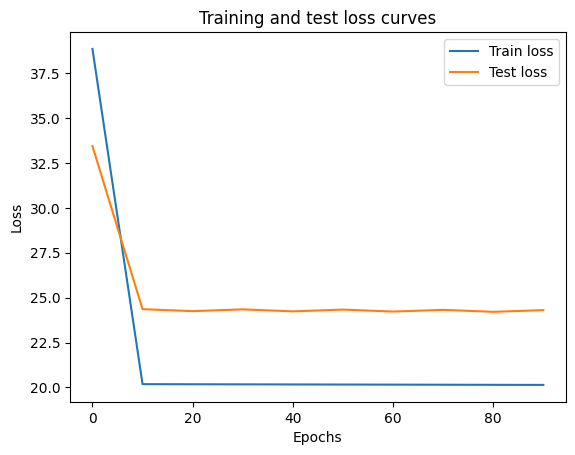

In [40]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [41]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([1.1594])), ('bias', tensor([0.3735]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [42]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  target_preds = model_0(features_test)
target_preds

tensor([67.6161, 67.6161, 67.6161, 67.6161, 67.6161, 67.6161, 67.6161, 67.6161,
        67.6161, 67.6161, 67.6161, 67.6161, 67.6161, 67.6161, 68.7755, 68.7755,
        68.7755, 68.7755, 68.7755, 68.7755, 68.7755, 68.7755, 68.7755, 68.7755,
        68.7755, 68.7755, 68.7755, 68.7755, 68.7755, 68.7755, 68.7755, 68.7755,
         7.3296,  7.3296,  7.3296,  7.3296,  7.3296,  7.3296,  7.3296,  7.3296,
         7.3296,  7.3296,  7.3296,  7.3296,  7.3296,  7.3296,  7.3296,  7.3296,
         7.3296,  7.3296])

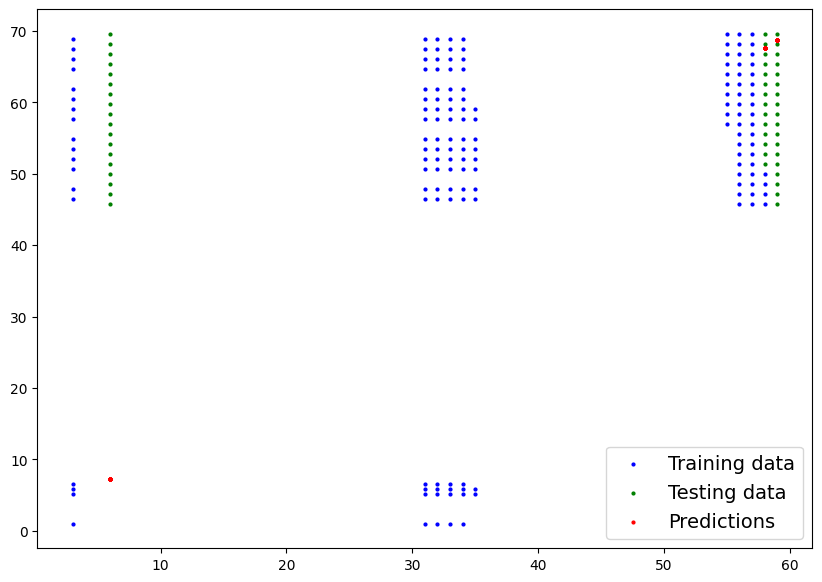

In [43]:
plot_predictions(predictions=target_preds)

In [44]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


In [45]:
# Check the saved file path
!dir models\01_pytorch_workflow_model_0.pth

 Volume in drive C has no label.
 Volume Serial Number is FC15-CE7C

 Directory of c:\Users\hp\Desktop\Coding Base Folder\arewaDSDeepLearning\exercise_submissions\week_2\models

12/28/2023  06:34 AM             1,680 01_pytorch_workflow_model_0.pth
               1 File(s)          1,680 bytes
               0 Dir(s)  138,883,383,296 bytes free


### The observations about the model